# _**Placement**_ #

1. Import Libraries

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score, roc_auc_score, roc_curve, precision_recall_curve

2. Load and Preprocess Data

In [245]:
df = pd.read_csv('data/Placement_Data_Full_Class.csv')

print(df.isnull().sum())

df.drop(['sl_no'], axis=1, inplace=True)

df['salary'] = df['salary'].fillna(0)

label_col = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
for col in label_col:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


3. EDA

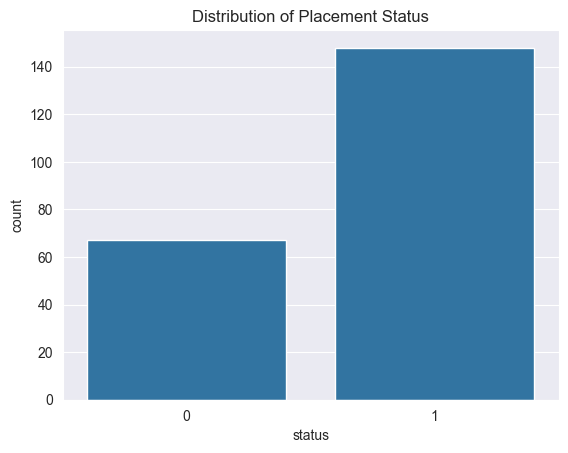

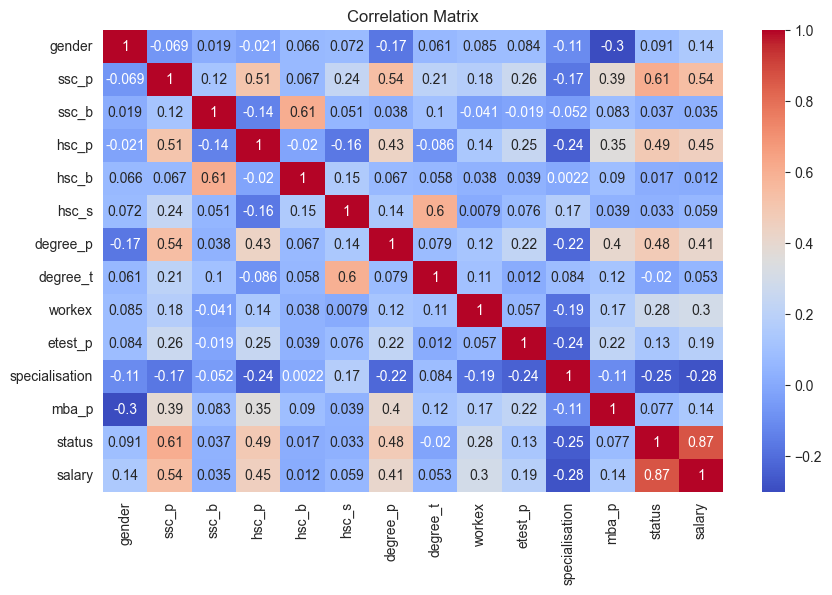

In [246]:
df.describe()

sns.countplot(x='status', data=df)
plt.title("Distribution of Placement Status")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

4. Prepare Data 

In [247]:
x = df.drop(['status', 'salary'], axis=1)
y = df['status']


num_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
scaler = StandardScaler()
x[num_cols] = scaler.fit_transform(x[num_cols])


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

5. Logistic Regression

Precision: 0.8837209302325582
Recall: 0.95
F1: 0.9156626506024096
logistic Regression AUC: 0.9392857142857143


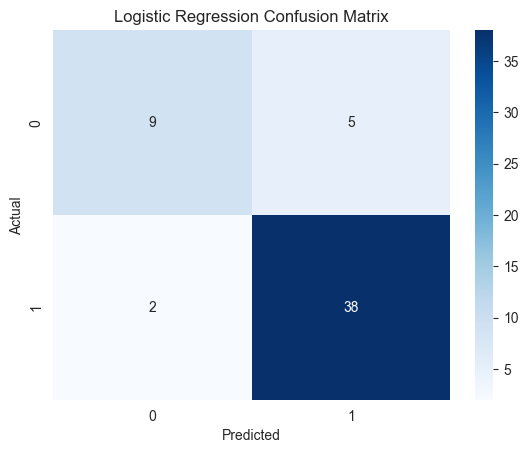

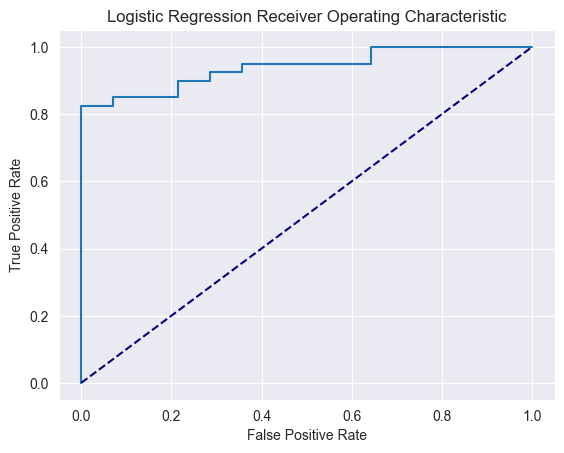

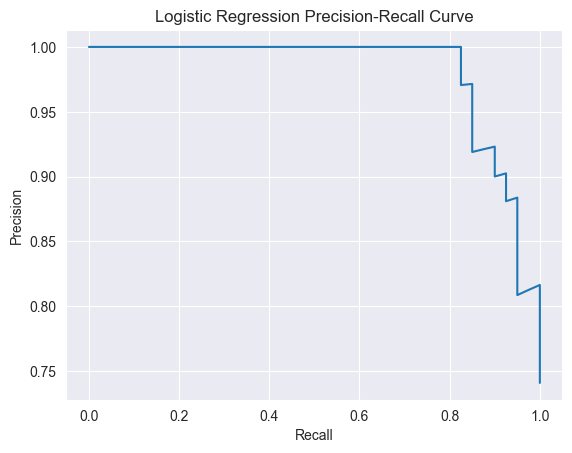

In [248]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)
lg_pred = lg_model.predict(x_test)
lg_prob = lg_model.predict_proba(x_test)[:, 1]


precision_lg = precision_score(y_test, lg_pred)
recall_lg = recall_score(y_test, lg_pred)
f1_lg = f1_score(y_test, lg_pred)
auc = roc_auc_score(y_test, lg_prob)

print('Precision:', precision_lg)
print('Recall:', recall_lg)
print('F1:', f1_lg)
print(f'logistic Regression AUC: {auc}')


cm = confusion_matrix(y_test, lg_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, lg_prob)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic')
plt.show()

prec, rec, thr = precision_recall_curve(y_test, lg_prob)
plt.plot(rec, prec, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curve')
plt.show()

6. Naive Bayes

Precision: 0.8571428571428571
Recall: 0.9
F1: 0.8780487804878049
Naive Bayes AUC: 0.8392857142857142


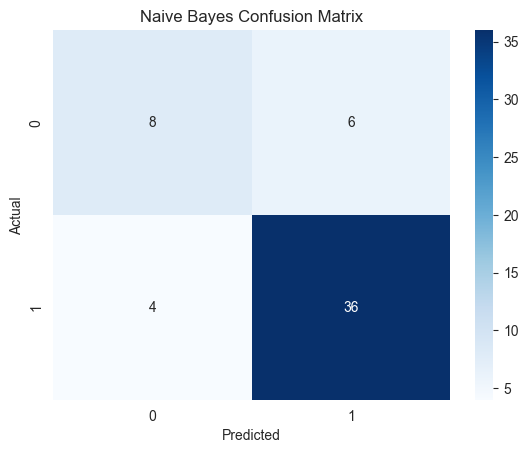

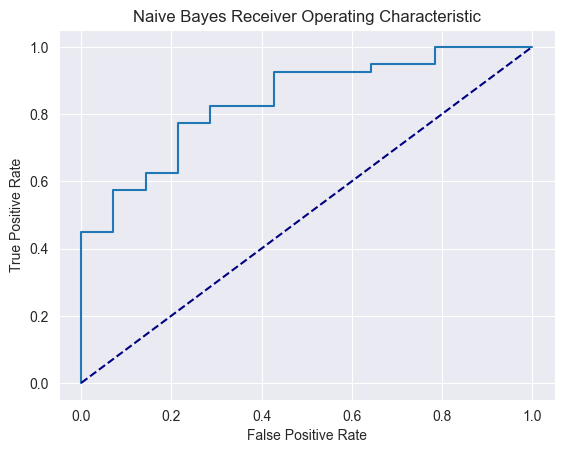

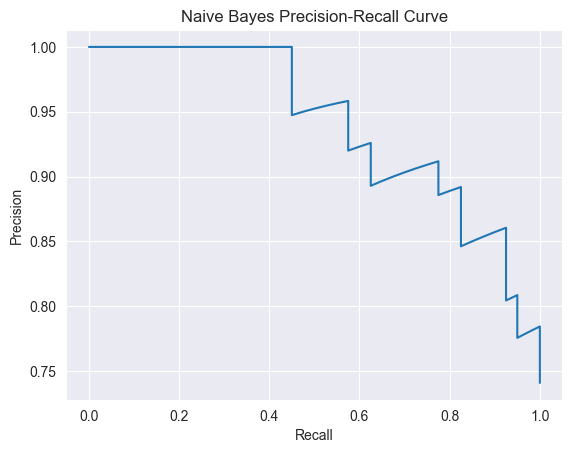

In [249]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)
NB_pred = NB_model.predict(x_test)
NB_Prob = NB_model.predict_proba(x_test)[:, 1]


precision_NB = precision_score(y_test, NB_pred)
recall_NB = recall_score(y_test, NB_pred)
f1_NB = f1_score(y_test, NB_pred)
auc = roc_auc_score(y_test, NB_Prob)

print('Precision:', precision_NB)
print('Recall:', recall_NB)
print('F1:', f1_NB)
print(f'Naive Bayes AUC: {auc}')

cm = confusion_matrix(y_test, NB_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, NB_Prob)
plt.plot(fpr, tpr, label='Naive Bayes (AUC = {:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver Operating Characteristic')
plt.show()

prec, rec, thr = precision_recall_curve(y_test, NB_Prob)
plt.plot(rec, prec, label='Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Naive Bayes Precision-Recall Curve')
plt.show()

7. Linear Discriminative Analysis 

Precision: 0.9047619047619048
Recall: 0.95
F1: 0.926829268292683
Linear Discriminant Analysis AUC: 0.9446428571428571


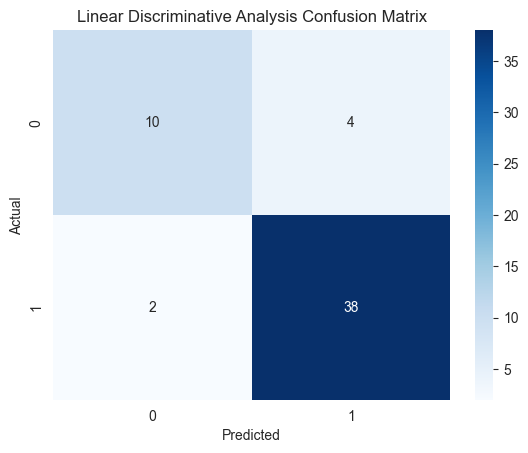

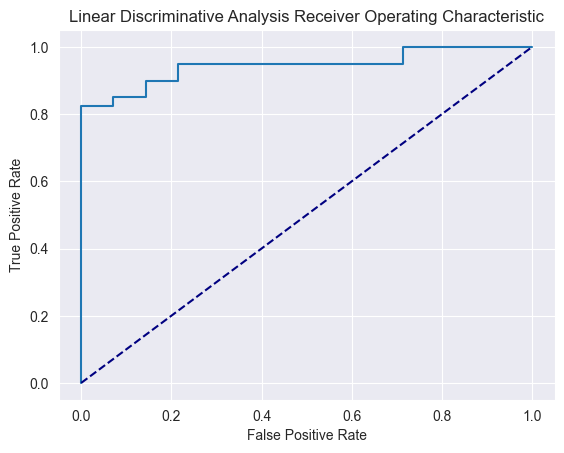

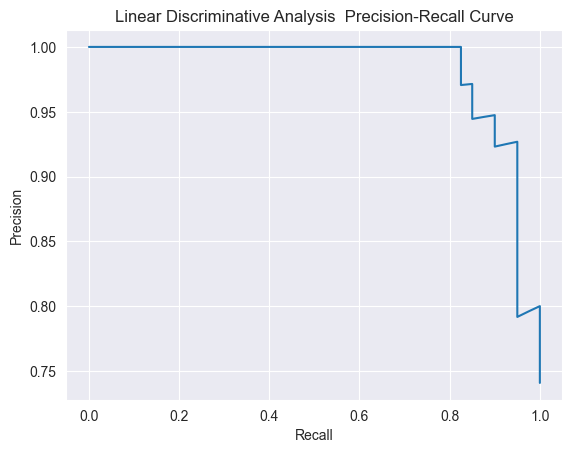

In [250]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(x_train, y_train)
LDA_pred = LDA_model.predict(x_test)
LDA_Prob = LDA_model.predict_proba(x_test)[:, 1]


precision_LDA = precision_score(y_test, LDA_pred)
recall_LDA = recall_score(y_test, LDA_pred)
f1_LDA = f1_score(y_test, LDA_pred)
auc = roc_auc_score(y_test, LDA_Prob)

print('Precision:', precision_LDA)
print('Recall:', recall_LDA)
print('F1:', f1_LDA)
print(f'Linear Discriminant Analysis AUC: {auc}')


cm = confusion_matrix(y_test, LDA_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Linear Discriminative Analysis Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, LDA_Prob)
plt.plot(fpr, tpr, label='Linear Discriminative Analysis  (AUC = {:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Discriminative Analysis Receiver Operating Characteristic')
plt.show()

prec, rec, thr = precision_recall_curve(y_test, LDA_Prob)
plt.plot(rec, prec, label='Linear Discriminative Analysis')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Linear Discriminative Analysis  Precision-Recall Curve')
plt.show()